# ITCS-3156 Final Project Spring 2025

## Name: Andrew Green

## Project Name: Credit Card Fraud Detection using Machine Learning

In [1]:
# Import the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

## Data Loading

In [2]:
# Load the csv file
# dataset are downloaded from : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

credit_df = pd.read_csv("creditcard.csv")
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Check for null values

credit_df.isnull().values.any()

np.False_

In [5]:
credit_df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [6]:
non_fraud = len(credit_df[credit_df.Class == 0])
fraud = len(credit_df[credit_df.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


**The Percentage of Fraud transactions is only 0.17%. We can see how imbalance the data is !**

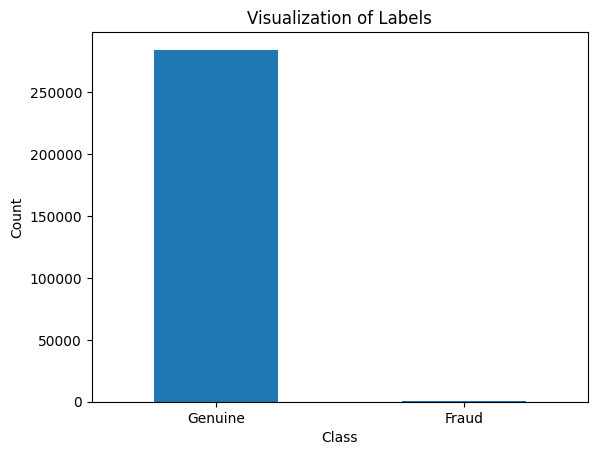

In [7]:
# Visualize the "Labels" column in our dataset

labels = ["Genuine", "Fraud"]
count_classes = credit_df.value_counts(credit_df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

## Data Preprocessing

In [8]:
# Perform Scaling on Amount
df2 = credit_df.copy()

scaler = StandardScaler()
df2["NormalizedAmount"] = scaler.fit_transform(df2["Amount"].values.reshape(-1, 1))
df2.drop(["Amount", "Time"], inplace= True, axis= 1)

y = df2["Class"]
X = df2.drop(["Class"], axis= 1)

In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [10]:
# Split the data
#(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

print("Shape of X_trn: ", X_trn.shape)
print("Shape of y_trn: ", y_trn.shape)
print("Shape of X_vld: ", X_vld.shape)
print("Shape of y_vld: ", y_vld.shape)
print("Shape of X_tst: ", X_tst.shape)
print("Shape of y_tst: ", y_tst.shape)
 

Shape of X_trn:  (182276, 29)
Shape of y_trn:  (182276,)
Shape of X_vld:  (45569, 29)
Shape of y_vld:  (45569,)
Shape of X_tst:  (56962, 29)
Shape of y_tst:  (56962,)


### Helper function

In [11]:
# The below function is directly taken from the scikit-learn website to plot the confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# The below function prints the following necesary metrics

def metrics(actuals, predictions):
    accuracy = accuracy_score(actuals, predictions)
    precision = precision_score(actuals, predictions)
    recall = recall_score(actuals, predictions)
    f1score = f1_score(actuals, predictions)
    print("Accuracy: {:.5f}".format(accuracy))
    print("Precision: {:.5f}".format(precision))
    print("Recall: {:.5f}".format(recall))
    print("F1-score: {:.5f}".format(f1score))

    return (accuracy, precision, recall, f1score)


## Decision Tree Classifier

In [12]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_trn, y_trn)

predictions_dt = decision_tree.predict(X_tst)
decision_tree_score = decision_tree.score(X_tst, y_tst) * 100

In [13]:
# Plot confusion matrix for Decision Trees
confusion_matrix_dt = confusion_matrix(y_tst, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[56838    26]
 [   22    76]]


Confusion matrix, without normalization


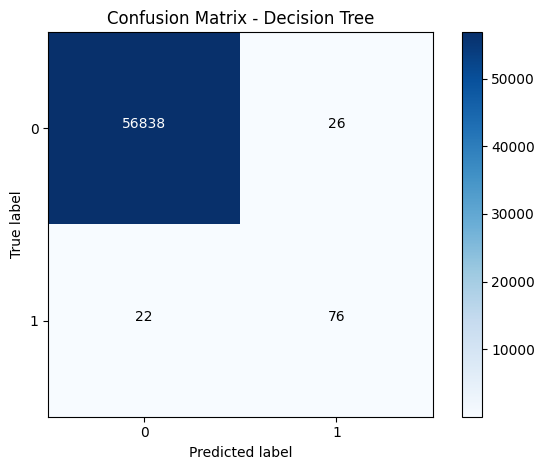

In [14]:
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree")

In [15]:
print("Evaluation of Decision Tree Model")
print()
metrics_dt = metrics(y_tst, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99916
Precision: 0.74510
Recall: 0.77551
F1-score: 0.76000


## Neural Network Classifier

In [16]:
import keras 
from keras import layers

### Neural Network Creation

In [17]:
model_kernel = keras.regularizers.l2(0.01)
layer_unit = 128
input_shape = (29,)

model = keras.models.Sequential([
    keras.Input(shape=input_shape),
    layers.Flatten(),
    layers.Dense(layer_unit, activation='relu', kernel_regularizer=model_kernel),
    layers.Dense(layer_unit, activation='relu', kernel_regularizer=model_kernel),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,481 (80.00 KB)

 Trainable params: 20,481 (80.00 KB)

 Non-trainable params: 0 (0.00 B)

### Model compile

In [18]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Train the model

In [19]:
# Train the model
history = model.fit(X_trn, y_trn, epochs=20)

Epoch 1/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9981 - loss: 0.1474
Epoch 2/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9991 - loss: 0.0074
Epoch 3/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9992 - loss: 0.0063
Epoch 4/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9992 - loss: 0.0059
Epoch 5/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9992 - loss: 0.0055
Epoch 6/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9992 - loss: 0.0054
Epoch 7/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9992 - loss: 0.0056
Epoch 8/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9991 - loss: 0.0057
Epoch 9/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9993 - loss: 0.0051
Epoch 10/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9992 - loss: 0.0050
Epoch 11/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9991 - loss: 0.0056
Epoch 12/20
5697/5697 ━━━━━━━━

In [20]:
model.predict(X_tst)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step


array([[7.6830745e-01],
       [2.7530853e-04],
       [3.8009480e-04],
       ...,
       [3.7469860e-04],
       [2.7530853e-04],
       [4.9429457e-04]], dtype=float32)

### Model Evaluate

In [21]:
loss, accuracy = model.evaluate(X_tst, y_tst, verbose=2)
print('Test accuracy:', accuracy)

1781/1781 - 2s - 1ms/step - accuracy: 0.9992 - loss: 0.0045
Test accuracy: 0.9991924166679382


## Oversampling for imbalanced data

As mentioned above, we can clearly observe the imbalance on our credit dataset. When dataset is imbalanced, the model learns to favor the majority class, leading to a high accuracy score that can be misleading. This bias can result in the model failing to accurately identify or predict instances of the minority class, even if it's crucial for the overall purpose of the mode.

The consequences of a biased model can be significant, particularly in areas where accuracy and reliability are paramount. For example, in fraud detection, a model that favors detecting non-fraudulent transactions might miss actual fraudulent activities, leading to financial losses. In medical diagnosis, a biased model could misclassify a rare disease, potentially leading to delayed or incorrect treatment.

The datasaet imbalance issue can be mitigated by various techniques, incuding Resampling, Class Weighting, Algorithm Selection and Adjusting Thresholding.
 
In this project, we will test the Resampling technique by oversampling the minority class (creating synthetic data) to balance the dataset.

In [22]:
#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='auto',random_state=0)

X_resampled, y_resampled = ros.fit_resample(X, y)

print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of y: ", y_resampled.shape)

value_counts = Counter(y_resampled)
print(value_counts)

Resampled shape of X:  (568630, 29)
Resampled shape of y:  (568630,)
Counter({0: 284315, 1: 284315})


### Get train and test data from resampled data

In [23]:
# Split the data 
X_trn_re, X_tst_re, y_trn_re, y_tst_re = train_test_split(X_resampled, y_resampled, train_size=.8, random_state=42)
X_trn_re, X_vld_re, y_trn_re, y_vld_re = train_test_split(X_trn_re, y_trn_re, train_size=.8, random_state=42)

print("Resampled shape of X_trn_re: ", X_trn_re.shape)
print("Resampled shape of y_trn_re: ", y_trn_re.shape)
print("Resampled shape of X_vld_re: ", X_vld_re.shape)
print("Resampled shape of y_vld_re: ", y_vld_re.shape)
print("Resampled shape of X_tst_re: ", X_vld_re.shape)
print("Resampled shape of y_tst_re: ", y_tst_re.shape)

Resampled shape of X_trn_re:  (363923, 29)
Resampled shape of y_trn_re:  (363923,)
Resampled shape of X_vld_re:  (90981, 29)
Resampled shape of y_vld_re:  (90981,)
Resampled shape of X_tst_re:  (90981, 29)
Resampled shape of y_tst_re:  (113726,)


## Decision Tree Classifier Based on oversampled data

In [24]:
# Decision Tree Classifier 
decision_tree.fit(X_trn_re, y_trn_re)

predictions_dt2 = decision_tree.predict(X_tst_re)
decision_tree_score2 = decision_tree.score(X_tst_re, y_tst_re) * 100

In [25]:
# Plot confusion matrix for Decision Trees
confusion_matrix_dt2 = confusion_matrix(y_tst_re, predictions_dt2.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt2)

Confusion Matrix - Decision Tree
[[56718    32]
 [    0 56976]]


Confusion matrix, without normalization


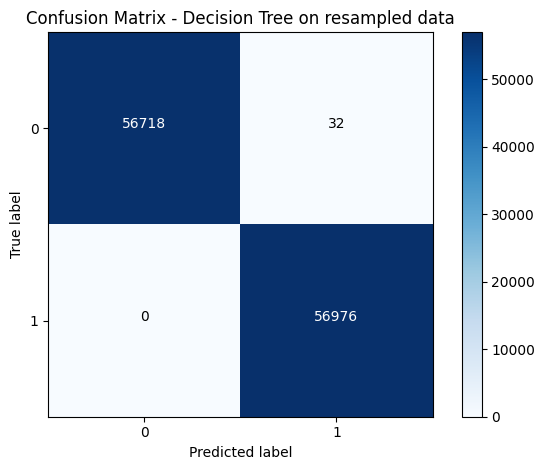

In [26]:
plot_confusion_matrix(confusion_matrix_dt2, classes=[0, 1], title= "Confusion Matrix - Decision Tree on resampled data")

In [27]:
print("Evaluation of Decision Tree Model over resampled data")
print()
metrics_dt2 = metrics(y_tst_re, predictions_dt2.round())

Evaluation of Decision Tree Model over resampled data

Accuracy: 0.99972
Precision: 0.99944
Recall: 1.00000
F1-score: 0.99972


## Neural Network Classifier over resampled data

In [28]:
model2 = keras.models.Sequential([
    keras.Input(shape=input_shape),
    layers.Flatten(),
    layers.Dense(layer_unit, activation='relu', kernel_regularizer=model_kernel),
    layers.Dense(layer_unit, activation='relu', kernel_regularizer=model_kernel),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,481 (80.00 KB)

 Trainable params: 20,481 (80.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
# Train the model
history2 = model2.fit(X_trn_re, y_trn_re, epochs=20)

Epoch 1/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9585 - loss: 0.2461
Epoch 2/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9876 - loss: 0.0733
Epoch 3/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9903 - loss: 0.0603
Epoch 4/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9911 - loss: 0.0565
Epoch 5/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9917 - loss: 0.0528
Epoch 6/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9912 - loss: 0.0522
Epoch 7/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9917 - loss: 0.0511
Epoch 8/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9921 - loss: 0.0498
Epoch 9/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9922 - loss: 0.0485
Epoch 10/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9921 - loss: 0.0498
Epoch 11/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9924 - loss: 0.04

In [31]:
model2.predict(X_tst_re)

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 620us/step


array([[9.9987364e-01],
       [9.9924558e-01],
       [6.4296324e-09],
       ...,
       [9.9922049e-01],
       [9.8870695e-01],
       [1.2334959e-07]], dtype=float32)

In [32]:
loss2, accuracy2 = model2.evaluate(X_tst_re, y_tst_re, verbose=2)
print('Test accuracy after resampling:', accuracy2) 

3554/3554 - 4s - 1ms/step - accuracy: 0.9952 - loss: 0.0388
Test accuracy after resampling: 0.9952077865600586


## Summary

Now it is evident that after addressing the class imbalance problem, our Decision Tree classifier performs far better than Decision Tree classifier without oversampling. At the same time, we see that the accuracy of Neutral Network with oversampling slightly degenerate.